In [1]:
!python --version

Python 3.11.8


In [3]:
!pip install pandas numpy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 48.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 43.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 48.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 kB 7.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 45.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 47.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 1.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
data_dir = os.getenv("DATA_DIR")


In [30]:
glob.glob(os.path.join(data_dir, "*.csv"))


['/data/ncr_ride_bookings_subset.csv']

In [31]:
target_file = glob.glob(os.path.join(data_dir, "*.csv"))[0]

target_file


'/data/ncr_ride_bookings_subset.csv'

In [37]:
df = pd.read_csv(target_file)

print(f"Data shape:  {df.shape}")

df.head(2)


Data shape:  (150000, 10)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Ride Distance,Booking Value,Ride Distance.1,Customer Rating
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,5.73,237.0,5.73,NaN


In [38]:
df.columns


Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Ride Distance', 'Booking Value', 'Ride Distance.1',
       'Customer Rating'],
      dtype='object')

In [39]:
# drop all nan records
df = df.dropna()

# only keep needed columns
keep_columns = ['Date', 'Time', 'Vehicle Type', 'Ride Distance', 'Customer Rating']
df = df[keep_columns].copy()

print(f"Cleaned data shape:  {df.shape}")


Cleaned data shape:  (93000, 5)


In [40]:
df


,Date,Time,Vehicle Type,Ride Distance,Customer Rating
2,2024-08-23,08:56:10,Auto,13.58,4.9
3,2024-10-21,17:17:25,Premier Sedan,34.02,5.0
4,2024-09-16,22:08:00,Bike,48.21,4.3
5,2024-02-06,09:44:56,Auto,4.85,4.6
6,2024-06-17,15:45:58,Go Mini,41.24,4.1
...,...,...,...,...,...
149995,2024-11-11,19:34:01,Go Mini,40.08,4.1
149996,2024-11-24,15:55:09,Go Mini,21.31,5.0
149997,2024-09-18,10:55:15,Go Sedan,15.93,4.4
149998,2024-10-05,07:53:34,Auto,45.54,3.7


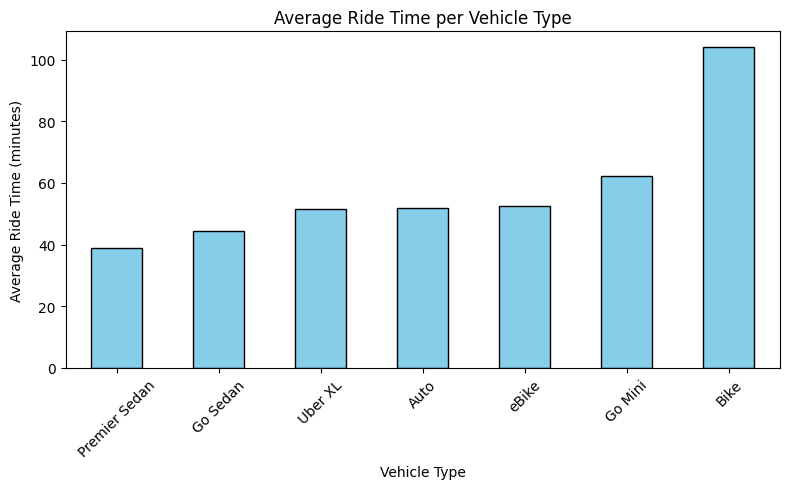

In [35]:
# Define assumed average speeds (km/h) for each vehicle type
avg_speeds = {
    "Auto": 30,           # km/h
    "Premier Sedan": 40,
    "Bike": 15,
    "Go Mini": 25,
    "Go Sedan": 35
}

# Calculate ride time (in minutes) based on distance and avg speed
df["Ride Time (min)"] = df.apply(
    lambda row: (row["Ride Distance"] / avg_speeds.get(row["Vehicle Type"], 30)) * 60,
    axis=1
)

# Group by vehicle type and compute average ride time
avg_times = df.groupby("Vehicle Type")["Ride Time (min)"].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
avg_times.plot(kind="bar", color="skyblue", edgecolor="black")
plt.ylabel("Average Ride Time (minutes)")
plt.title("Average Ride Time per Vehicle Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

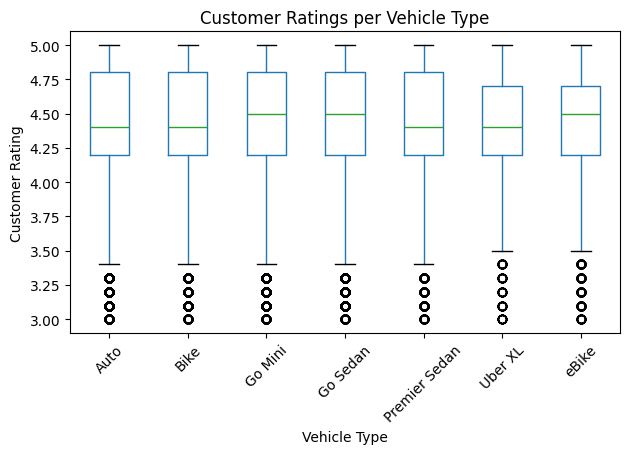

In [41]:
# Plot boxplot of customer ratings per vehicle type
plt.figure(figsize=(8,6))
df.boxplot(column="Customer Rating", by="Vehicle Type", grid=False)
plt.title("Customer Ratings per Vehicle Type")
plt.suptitle("")  # remove default Pandas title
plt.xlabel("Vehicle Type")
plt.ylabel("Customer Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
